In [1]:
import pandas as pd
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt 
plt.style.use("seaborn")


C:\Users\Kamir\AppData\Local\Temp\ipykernel_6400\4196856592.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
Tickers = ["BAC","WFC","BABA","USB"]
Start = "2023-06-01"
End = "2023-09-09"

In [3]:
Pf = yf.download(Tickers,Start,End).Close

[*********************100%%**********************]  4 of 4 completed


In [4]:
Pf

,BABA,BAC,USB,WFC
Date,,,,
2023-06-01,83.000000,27.780001,30.520000,40.060001
2023-06-02,84.269997,28.709999,31.740000,41.240002
2023-06-05,84.400002,28.540001,31.219999,40.450001
2023-06-06,86.699997,29.230000,32.630001,41.259998
2023-06-07,85.279999,29.480000,33.259998,42.070000
...,...,...,...,...
2023-09-01,95.010002,28.980000,37.070000,41.650002
2023-09-05,94.650002,28.650000,36.520000,41.540001
2023-09-06,94.449997,28.389999,36.119999,41.020000


In [5]:
Pf.describe()

,BABA,BAC,USB,WFC
count,69.000000,69.000000,69.000000,69.000000
mean,90.956811,29.626667,35.707101,42.943623
std,4.753143,1.356801,2.720522,1.822618
min,83.000000,27.750000,30.520000,40.060001
25%,86.889999,28.650000,33.259998,41.540001
50%,91.199997,29.170000,36.020000,42.470001
75%,94.559998,30.930000,38.419998,43.740002
max,102.160004,32.650002,40.230000,47.130001


<Axes: xlabel='Date'>

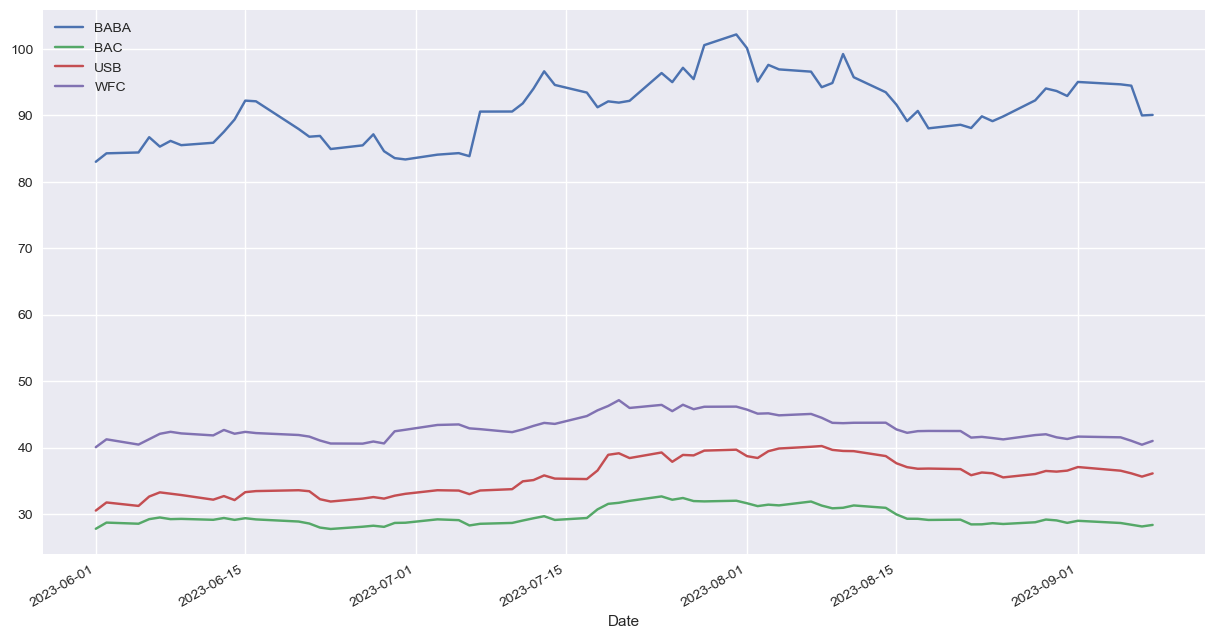

In [6]:
Pf.plot(figsize=(15,8))

In [7]:
Returns = np.log(Pf/Pf.shift())
Returns

,BABA,BAC,USB,WFC
Date,,,,
2023-06-01,NaN,NaN,NaN,NaN
2023-06-02,0.015185,0.032929,0.039195,0.029030
2023-06-05,0.001542,-0.005939,-0.016519,-0.019342
2023-06-06,0.026886,0.023889,0.044173,0.019827
2023-06-07,-0.016514,0.008516,0.019123,0.019441
...,...,...,...,...
2023-09-01,0.022459,0.010755,0.014674,0.008681
2023-09-05,-0.003796,-0.011452,-0.014948,-0.002645
2023-09-06,-0.002115,-0.009116,-0.011013,-0.012597


In [8]:
Annu_mean = (Returns.mean()*252).to_frame().T
Annu_mean.index=["Annual Mean"]
Annu_mean

,BABA,BAC,USB,WFC
Annual Mean,0.30212,0.076576,0.623284,0.085953


In [9]:
Annu_std = (Returns.std()*np.sqrt(252)).to_frame().T
Annu_std.index=["Annual Std"]
Annu_std

,BABA,BAC,USB,WFC
Annual Std,0.375268,0.229302,0.306081,0.219998


In [10]:
Returns.corr()

,BABA,BAC,USB,WFC
BABA,1.000000,0.398699,0.415092,0.316380
BAC,0.398699,1.000000,0.791890,0.756053
USB,0.415092,0.791890,1.000000,0.717530
WFC,0.316380,0.756053,0.717530,1.000000


In [11]:
import seaborn as sns

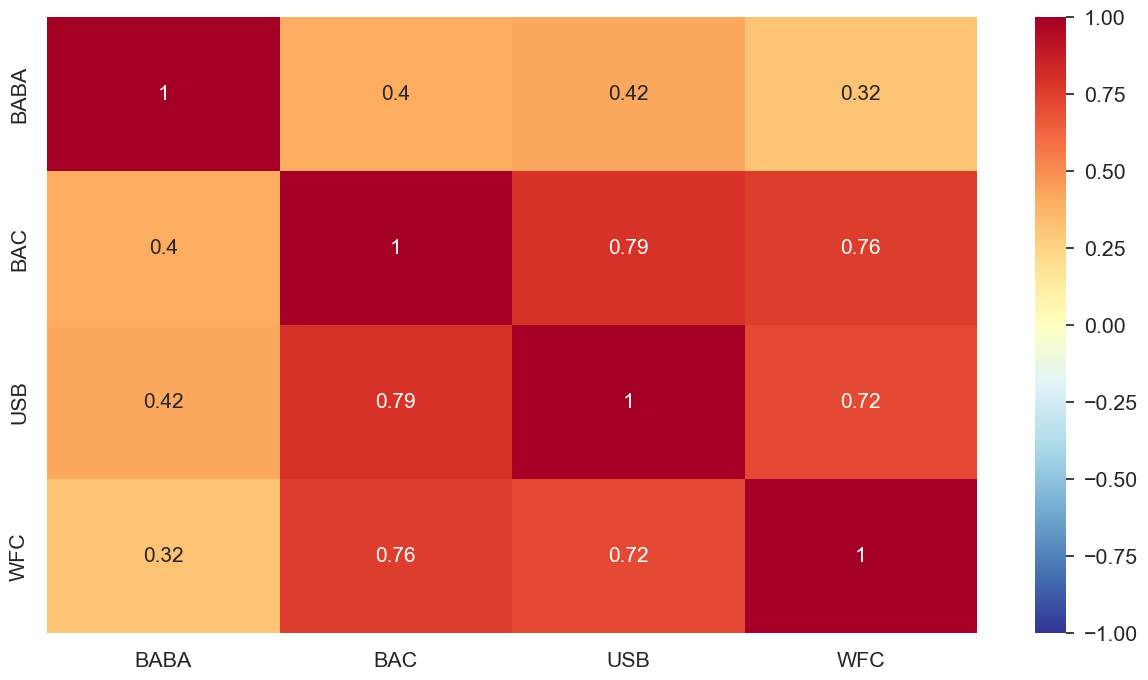

In [12]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.4)
sns.heatmap(Returns.corr(), cmap= "RdYlBu_r", annot = True, annot_kws={"size":15}, vmin=-1, vmax=1)
plt.show()

In [13]:
Roi = Pf.iloc[-1]-Pf.iloc[0]
Roi.to_frame().T

,BABA,BAC,USB,WFC
0,7.050003,0.58,5.59,0.939999
